In [1]:
# Initalization of FUSE in this juptyer notebook
using Pkg
Pkg.activate("..")
using Revise
using FUSE
using Plots; gr();

  Activating project at `~/.julia/dev/FUSE`
┌ Info: Precompiling FUSE [e64856f0-3bb8-4376-b4b7-c03396503992]
└ @ Base loading.jl:1423


In [23]:
# Setting up initalization parameters => ini (https://fuse.help/ini.html)
#                and actor parameters => act (https://fuse.help/act.html)  
ini, act = FUSE.case_parameters(:FPP; version=:v1, init_from=:ods);

# Changing the Zeff from 1.1 to 2.0 improve confinement significantly due to the pedestal increase!
ini.core_profiles.zeff = 2.0;

# Show the ini parameters
display(ini)

ini
├─ equilibrium
│  ├─ field_null_surface
│  ├─ βn
│  ├─ ϵ
│  ├─ symmetric
│  ├─ ngrid
│  ├─ Z0
│  ├─ R0
│  ├─ δ
│  ├─ B0
│  ├─ κ
│  ├─ x_point
│  └─ ip
├─ ec_launchers
│  ├─ efficiency_transmission
│  ├─ power_launched
│  └─ efficiency_conversion
├─ ic_antennas
│  ├─ efficiency_coupling
│  ├─ efficiency_transmission
│  ├─ power_launched
│  └─ efficiency_conversion
├─ build
│  ├─ symmetric
│  ├─ blanket
│  ├─ n_first_wall_conformal_layers
│  ├─ layers
│  ├─ vessel
│  └─ shield
├─ oh
│  ├─ flattop_duration
│  └─ technology
│     ├─ temperature
│     ├─ material
│     ├─ fraction_void
│     ├─ ratio_SC_to_copper
│     ├─ JxB_strain
│     ├─ fraction_stainless
│     └─ thermal_strain
├─ center_stack
│  ├─ bucked
│  ├─ noslip
│  └─ plug
├─ general
│  ├─ casename
│  └─ init_from
├─ nbi
│  ├─ beam_mass
│  ├─ toroidal_angle
│  ├─ efficiency_transmission
│  ├─ power_launched
│  ├─ efficiency_conversion
│  └─ beam_energy
├─ gasc
│  ├─ filename
│  └─ case
├─ pf_active
│  ├─ n_pf_coils_inside
│

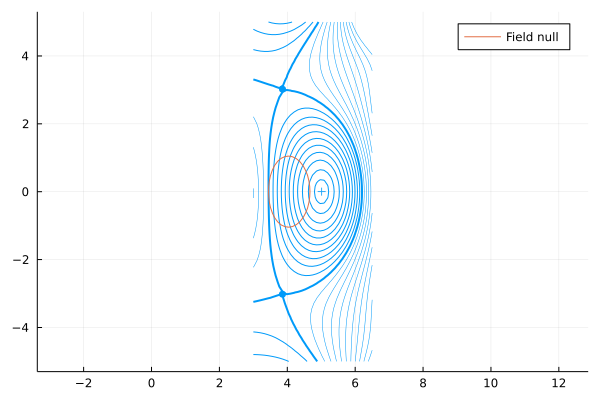

LoadError: Vector{Vector{Float64}} is the wrong type for build.structure[:].outline.r, it should be Union{Missing, Function, AbstractVector{<:Real}})

In [24]:
# Initalization of a new dd datastructure (https://fuse.help/dd.html)
dd = IMAS.dd()

# Fill the new datastructure using the ini parameters
FUSE.init(dd, ini, act; do_plot=true)

# Run the equilibrium - transport actor (https://fuse.help/actors.html#EquilibriumTransport)
#FUSE.ActorEquilibriumTransport(dd, act; do_plot=true)

In [14]:
# Plot

display(plot(dd.core_profiles))
display(plot(dd.core_sources))

display(plot(dd.build))
display(plot!(dd.equilibrium))

LoadError: Attempt to access 0-element IMASDD.IDSvector{IMASDD.core_profiles__profiles_1d} at index [1]. Need to `resize!(ids, 1)`